In [ ]:
#Importa as bibliotecas necessárias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Mount do drive compartilhado 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dft = pd.read_csv('/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/distance-user-def.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dft.query("ORDER_ID == 117818357")

,ORDER_ID,STOREKEEPER_ID,DISTANCE_TO_USER,BUNDLE_ID
0,117818357,NaN,2.315865,NaN


In [ ]:
# Import do dataframe consolidado
df = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/df-oficial.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157470 entries, 0 to 157469
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  157470 non-null  int64  
 1   IS_ACTIVE                   157470 non-null  int64  
 2   AUTO_ACEITE                 157470 non-null  int64  
 3   COOKING_TIME_MEDIO          157470 non-null  float64
 4   ITENS_MEDIO                 157470 non-null  float64
 5   DISTANCE_TO_USER            157470 non-null  float64
 6   CANCELS_OPS_RT              157470 non-null  float64
 7   ACCEPTANCE_RATE             157470 non-null  float64
 8   PUNISHMENT_MINUTES          157470 non-null  float64
 9   TEMPORARY_BLOCKS            157470 non-null  float64
 10  WARNINGS                    157470 non-null  float64
 11  ORDERS_PER_HOURS_CONNECTED  157470 non-null  float64
 12  age-1st-qtile               157470 non-null  int64  
 13  age-2nd-qtile 

In [ ]:
#df['IS_ACTIVE'] = df['IS_ACTIVE'].replace(to_replace= 2, value = 0)

In [ ]:
df['IS_ACTIVE'].value_counts()

2    100249
1     38045
0     19176
Name: IS_ACTIVE, dtype: int64

In [ ]:
x = df.drop(columns=["IS_ACTIVE", 'Unnamed: 0',
                     'ITENS_MEDIO']) # features
y = df["IS_ACTIVE"] # target

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.15, 
                                                    random_state = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Instaciando o objeto scaler
scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train[list(x_train.columns)] = scaler.fit_transform(x_train[list(x_train.columns)])

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,]
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test[list(x_test.columns)] = scaler.transform(x_test[list(x_test.columns)])

In [ ]:
y_train.squeeze()

88702     1
33173     2
47986     2
62746     2
106989    2
         ..
73349     2
109259    2
50057     2
5192      1
128037    2
Name: IS_ACTIVE, Length: 133849, dtype: int64

In [ ]:
import lightgbm as lgb

# Criando o modelo

model = lgb.LGBMClassifier()

model.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
print('Acuracidade (treino): ', model.score( x_train, y_train ))
print('Acuracidade (teste): ', model.score( x_test, y_test ))

Acuracidade (treino):  0.8660356072888106
Acuracidade (teste):  0.860082130307777


In [ ]:
y_pred_lgb = model.predict(x_test)

In [ ]:
y_true = y_test

In [ ]:
cm_lgb = confusion_matrix(y_true, y_pred_lgb, normalize = 'true')
cm_lgb

array([[0.98282828, 0.0016835 , 0.01548822],
       [0.00174216, 0.59529617, 0.40296167],
       [0.00476159, 0.05767554, 0.93756287]])

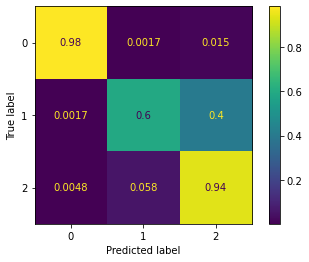

In [ ]:
# versão visual mais bonita da matriz
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, 
                              display_labels=model.classes_)

disp_lgb.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2970
           1       0.80      0.60      0.68      5740
           2       0.86      0.94      0.89     14911

    accuracy                           0.86     23621
   macro avg       0.88      0.84      0.85     23621
weighted avg       0.86      0.86      0.85     23621



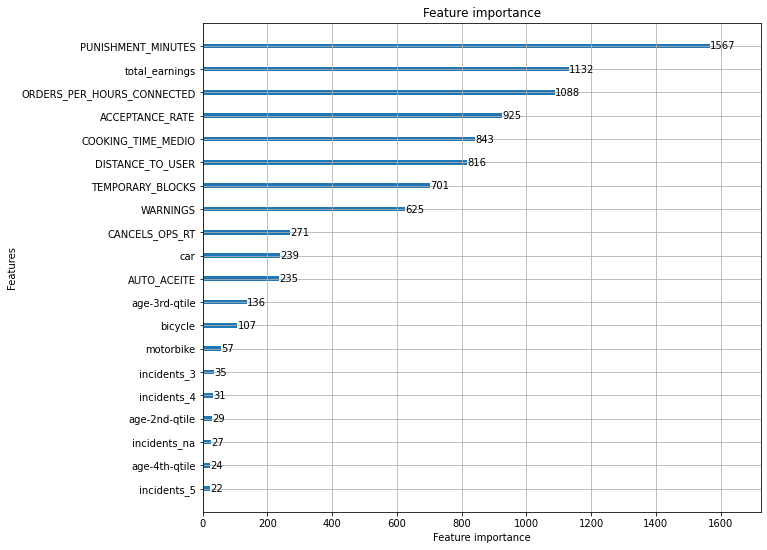

In [ ]:
lgb.plot_importance(model, max_num_features = 20, figsize=(10, 9))

In [ ]:
#from imblearn.under_sampling import SMOTE

from imblearn.under_sampling import TomekLinks 

rus = TomekLinks()
x_und, y_und = rus.fit_resample(x, y)

print(y.value_counts())
print(y_und.value_counts())

2    100249
1     38045
0     19176
Name: IS_ACTIVE, dtype: int64
2    89602
1    28537
0    19176
Name: IS_ACTIVE, dtype: int64


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_und, y_und, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [ ]:
# Instaciando o objeto scaler1
scaler1 = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train1[list(x_train1.columns)] = scaler1.fit_transform(x_train1[list(x_train1.columns)])

# Agora utilizando o scaler1 no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,]
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test1[list(x_test1.columns)] = scaler1.transform(x_test1[list(x_test1.columns)])

In [ ]:
y_train1.squeeze()

99816     2
90480     1
111757    2
123007    0
25728     1
         ..
73349     2
109259    2
50057     2
5192      1
128037    0
Name: IS_ACTIVE, Length: 96120, dtype: int64

In [ ]:
model1 = lgb.LGBMClassifier()

In [ ]:
model1.fit(x_train1, y_train1)

LGBMClassifier()

In [ ]:
print('Acuracidade (treino): ', model1.score( x_train1, y_train1 ))
print('Acuracidade (teste): ', model1.score( x_test1, y_test1 ))

Acuracidade (treino):  0.9013732833957553
Acuracidade (teste):  0.892656875834446


In [ ]:
y_pred_lgb1 = model1.predict(x_test1)

In [ ]:
y_true1 = y_test1

In [ ]:
cm_lgb = confusion_matrix(y_true1, y_pred_lgb1, normalize = 'true')
cm_lgb

array([[0.98102794, 0.00379441, 0.01517765],
       [0.00128911, 0.64983007, 0.34888082],
       [0.00461584, 0.04466945, 0.95071471]])

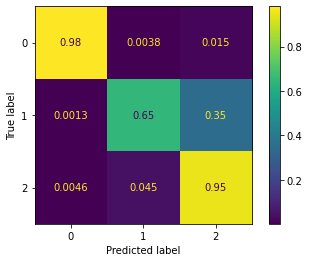

In [ ]:
# versão visual mais bonita da matriz
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, 
                              display_labels=model1.classes_)

disp_lgb.plot()
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_lgb1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5798
           1       0.82      0.65      0.72      8533
           2       0.89      0.95      0.92     26864

    accuracy                           0.89     41195
   macro avg       0.90      0.86      0.87     41195
weighted avg       0.89      0.89      0.89     41195



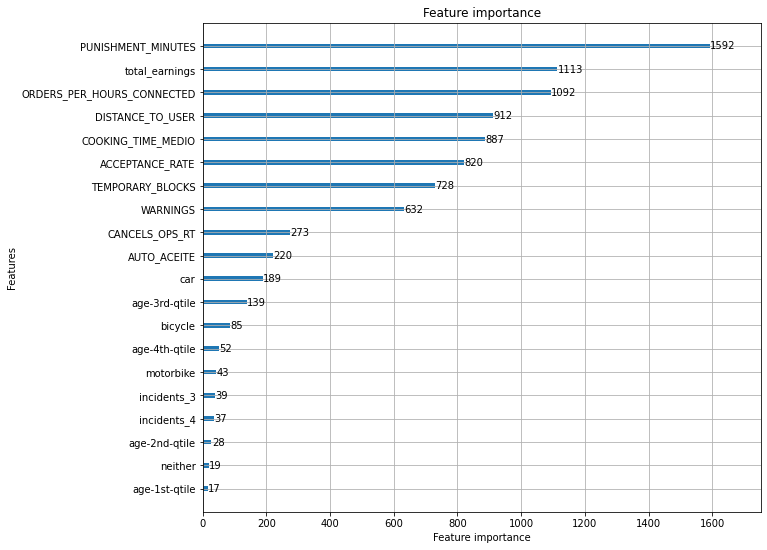

In [ ]:
lgb.plot_importance(model1, max_num_features = 20, figsize=(10, 9))

#Shap - Avaliação 

In [ ]:
#Explainable AI - By Shap 
!pip install shap -q 

import shap

explaner = shap.Explainer(model)
shap_values = explaner.shap_values(x_test)

     |████████████████████████████████| 569 kB 5.2 MB/s 


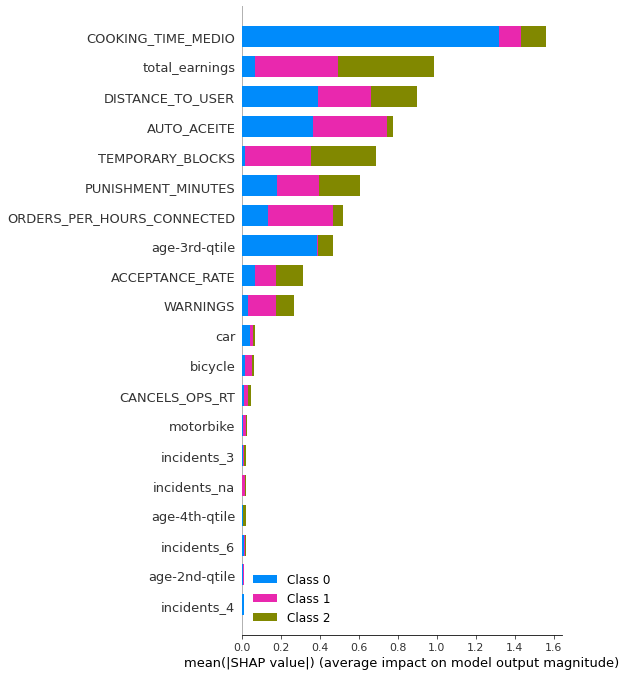

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar");

In [ ]:
y = model.predict_proba(x_test) 
y

array([[8.84030006e-04, 2.91333508e-01, 7.07782462e-01],
       [1.71860843e-03, 6.62715734e-01, 3.35565658e-01],
       [2.38614414e-04, 9.92859775e-01, 6.90161107e-03],
       ...,
       [1.65975418e-03, 5.77668751e-02, 9.40573371e-01],
       [9.58423481e-01, 2.11901403e-03, 3.94575049e-02],
       [4.47428371e-04, 3.26095475e-02, 9.66943024e-01]])

In [ ]:
explaner1 = shap.Explainer(model1)
shap_values1 = explaner.shap_values(x_test1)

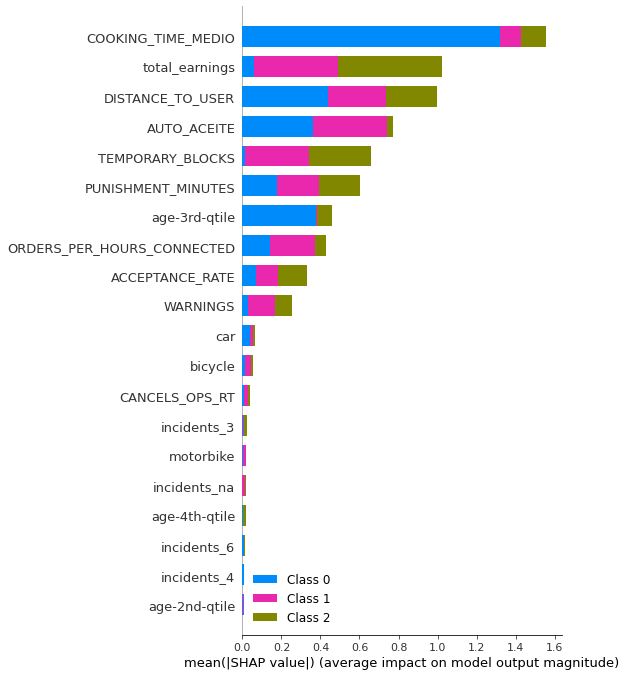

In [ ]:
shap.summary_plot(shap_values1, x_test, plot_type="bar");

In [ ]:
y1 = model1.predict_proba(x_test1, values_format = '.2') 
y1

array([[7.45797381e-04, 1.34601728e-01, 8.64652475e-01],
       [5.12690838e-04, 3.22767072e-02, 9.67210602e-01],
       [1.72509887e-03, 2.01783504e-01, 7.96491397e-01],
       ...,
       [5.92936827e-04, 5.82285274e-02, 9.41178536e-01],
       [5.37144651e-04, 9.93855914e-01, 5.60694136e-03],
       [8.01409767e-04, 4.58248490e-02, 9.53373741e-01]])

#Shap Waterfall

In [ ]:
expected_value = explaner.expected_value
expected_value

[-5.307865219761004, -1.748846854657723, -0.4788042827780753]

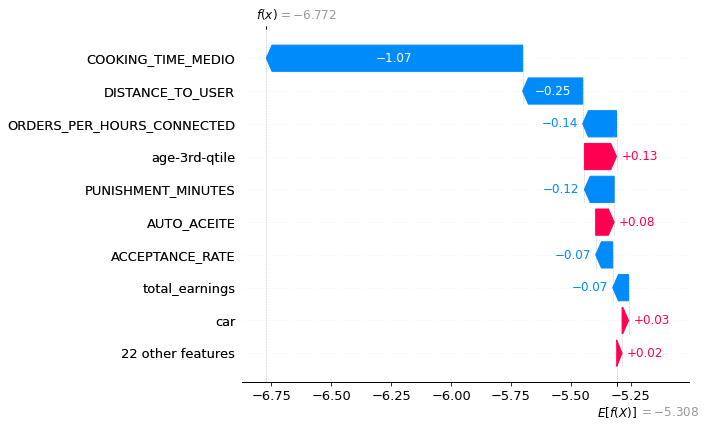

In [ ]:
amostra = 3 
classe = 0
base_line = expected_value[classe]
shap_amostra = shap_values[classe][amostra].reshape(-1)

shap.plots._waterfall.waterfall_legacy(expected_value=base_line, 
                                       shap_values=shap_amostra, 
                                       feature_names=x_test.columns, show=True)

In [ ]:
expected_value1 = explaner.expected_value
expected_value1

[-5.307865219761004, -1.748846854657723, -0.4788042827780753]